## Chapter 06. Binary / Multi-Label Classification(Lecture) 

### 1. Binary Classification
- Class : 2 <br>
 -> example_01 : which is cats(0)? or dogs(1)? <br>
 -> example_02 : Pass(1)/Fail(0) based on study hours?

#### 1-1. Hypothesis
- Linear Regression -> [1] data 특성에 따라 제대로 분류가 안됨 / [2] 분류시 0보다 작은 값 / 1보다 큰 값이 나올 수 있음
- Sigmoid Function: $G(z) = {1 \over 1 + e^{-z}}$

 $ \therefore Logistic / Hypothesis: H(X) = {1 \over 1 + e^{- WX}} $

#### 1.2 Cost function
- selectpoint(Class boundary) -> Gradient = 0 

[1] Cross Entropy
- Difference between two probability distribution
- 수식($P(x)$ :Real probability disbtribution, $P(x)$ : prediction probability distribuion) 
- classification function의 기초
<br>

$$ H(P,Q) = - {\sum_{} P(x)\log(Q(x))} $$ 

[2] cost function 정의

$$c(H(x), y) =  \begin{cases} -log(H(x)) & \mbox{if y =1} \\
-log(1-H(x)) & \mbox{if y = 0} \end{cases} $$ 

<br>

$$c(H(x), y) =  -ylog(H(x)) - (1-y)log(1-H(x))$$ 

<br>

### 2. Multinomial classification

### 2.1 Hypothesis
- Multi class 각각의 나올 확률(각각의 클래스 0과 1사이 / 모두 합하면 1)
- softmax function: 
$$ softmax(\hat{y_{i}}) = {e^{\hat{y_{i}}} \over \sum_{j} e^{\hat{y_{i}}}} $$

### 2.2 cost function (이전 binary sigmoid 대신 softmax)

$$ Cost(W,b) = \sum_{i} y_{i} log(Softmax(WX+B))) $$ 
$$ \because \hat(y) = WX + b $$

## Chapter 07. Binary / Multi-Label Classification with Pytorch (Labe) 

### Lab3. Pytorch Classification (Logistic Regression vs MLP)

#### Install Pytorch 1.0 (For Google Colab)

In [ ]:
"""#구글 Colab에서 실행할 때는 이 주석을 해제하시고 실행해서 pytorch 1.0을 깔아주세요! """
!pip install -q torch==1.0.0 torchvision
import torch
print(torch.__version__)

     |████████████████████████████████| 591.8 MB 576 bytes/s 
     |████████████████████████████████| 23.3 MB 91.7 MB/s 
     |████████████████████████████████| 23.3 MB 436 kB/s 
     |████████████████████████████████| 22.1 MB 31.8 MB/s 
     |████████████████████████████████| 22.1 MB 1.1 MB/s 
     |████████████████████████████████| 17.4 MB 21.6 MB/s 
     |████████████████████████████████| 17.3 MB 39.9 MB/s 
     |████████████████████████████████| 12.8 MB 18 kB/s 
     |████████████████████████████████| 12.7 MB 17.1 MB/s 
     |████████████████████████████████| 11.8 MB 36.4 MB/s 
     |████████████████████████████████| 5.9 MB 68.4 MB/s 
     |████████████████████████████████| 6.6 MB 95.0 MB/s 
     |████████████████████████████████| 6.6 MB 66.3 MB/s 
     |████████████████████████████████| 4.0 MB 69.0 MB/s 
     |████████████████████████████████| 10.2 MB 1.1 MB/s 
     |████████████████████████████████| 10.1 MB 91.5 MB/s 
     |████████████████████████████████| 8.8 MB 25.2 MB/s 
    

#### 1. Data Generation  (Preparation)

- X(input): 2차원,  continuous space 분포 / Y(Class): 1차원, discrete space 분포
- 실습 문제: 방사형 데이터 분포를 가상으로 만든 후 분류(Decision-boundary)

<br> 

**Data Set**  
$$X_{train} \in \mathcal{R}^{8000 \times 2}, Y_{train} \in \mathcal{Z}^{8000}$$  
$$X_{val} \in \mathcal{R}^{1000 \times 2}, Y_{val} \in \mathcal{Z}^{1000}$$  
$$X_{test} \in \mathcal{R}^{1000 \times 2}, Y_{test} \in \mathcal{Z}^{1000}$$

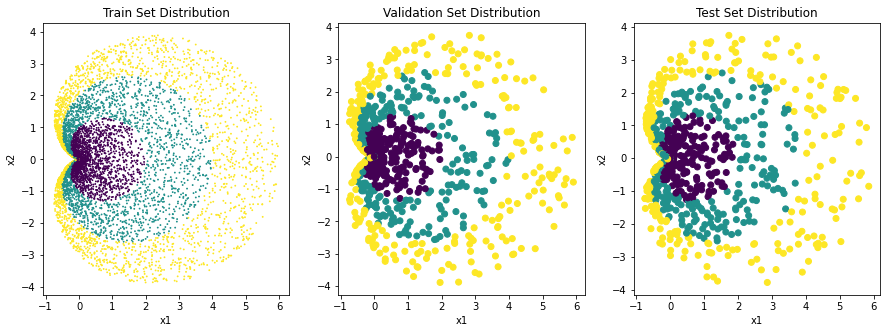

In [ ]:
%matplotlib inline

import numpy as np
import matplotlib.pyplot as plt

# (1) Generating Dataset
r = np.random.rand(10000)*3             # Y의 값을 Random sampling
theta = np.random.rand(10000)*2*np.pi   # 
y = r.astype(int)                       # Y의 값을 정수형(분류 Class)
r = r * (np.cos(theta) + 1)
x1 = r * np.cos(theta)
x2 = r * np.sin(theta)
X = np.array([x1, x2]).T
 
# (2) Split the Dataset(Train, Validation, Test) 
train_X, train_y = X[:8000, :], y[:8000]
val_X, val_y = X[8000:9000, :], y[8000:9000]
test_X, test_y = X[9000:, :], y[9000:]

# (3) Visualization data
# 3.1 Train set 분포
fig = plt.figure(figsize=(15,5))                              
ax1 = fig.add_subplot(1, 3, 1)
ax1.scatter(train_X[:, 0], train_X[:, 1], c=train_y, s=0.7)   # Train 시각화(color: class / 크기 0.7) 
ax1.set_xlabel('x1')                                          # plot xlabel, ylabel 정의
ax1.set_ylabel('x2')
ax1.set_title('Train Set Distribution')                       # plot title 정의

# 3-2. validation set 분포
ax2 = fig.add_subplot(1, 3, 2)                                
ax2.scatter(val_X[:, 0], val_X[:, 1], c=val_y)                # Validation 시각화
ax2.set_xlabel('x1')
ax2.set_ylabel('x2')
ax2.set_title('Validation Set Distribution')

# 3.3 Test set 분포
ax3 = fig.add_subplot(1, 3, 3)
ax3.scatter(test_X[:, 0], test_X[:, 1], c=test_y)             # Test 시각화
ax3.set_xlabel('x1')
ax3.set_ylabel('x2')
ax3.set_title('Test Set Distribution')

plt.show()

#### 2. Hypothesis Define (Model Define)  
- 주의할 점: Module 내에서 softxmax를 사용할 필 요 없음(파이썬 내장 CrossEntropyLoss 함수에 포함되어 있음)

<br> 

**Multi-Label Logistic Model**   
$$z = \ XW + b \ \ ( W \in \mathcal{R}^{2 \times 3}, b \in \mathcal{R}^{3}, z \in \mathcal{R}^{N \times 3})$$
$$H = \ softmax(z) \ \ (  H \in \mathcal{R}^{N \times 3})$$  

<br>

- $ W $ : input(2차원) -> class 개수(3차원) / ${2 \times 3}$ Metrix 
- $ b $ : 3차원(class 편향) / ${1 \times 3}$ Metrix 
- $ z $ : N은 데이터 개수 / ${N \times 3}$ Metrix 


In [ ]:
import torch
import torch.nn as nn

class LinearModel(nn.Module):    # LinearModel 선언(Linear regressoin 모델 Calss)
    def __init__(self): 
        super(LinearModel, self).__init__()  
        self.linear = nn.Linear(in_features=2, out_features=3, bias=True)  # input(2차원 = in_features, 입력 차원) / output(out_features, class 차원) 
    
    def forward(self, x):       # forward 선언(linear 선언)
        x = self.linear(x)      
        # x = self.softmax(x)   # 앞선 loss function을 nn.CrossEntropy로 사용할 경우 내부의 이미 Log_softmax를 포함 -> softmax 두번 되어서 학습이 제대로 안 될 수 있음   
        return x

#### 3. Cost Function Define (Loss Function Define)  

- Multi-Label Problem Loss Funcntion 생성
- 참고사이트: https://pytorch.org/docs/stable/_modules/torch/nn/modules/loss.html
- CrossEntropy Doumentation: https://pytorch.org/docs/stable/nn.html#crossentropyloss


`input`: $ N \times Num Class $ 차원, float 형태  
`target(label)`: $ N $ 차원(i: i번쨰 class), int 형태

In [ ]:
cls_loss = nn.CrossEntropyLoss()

In [ ]:
""" # Cross Entropy Test(직접) """
test_pred_y = torch.Tensor([[2,0.1],[0,1]]) 
test_true_y1 = torch.Tensor([1,0]).long()   # torch 숫자 생성 시 자동으로 float 형태 -> target을 int로 바꾸기 위해서 long
test_true_y2 = torch.Tensor([0,1]).long()   

print(cls_loss(test_pred_y, test_true_y1))  # 각각의 
print(cls_loss(test_pred_y, test_true_y2))

tensor(1.6763)
tensor(0.2263)


### 4. Train & Evaluation
Pytorch 내 
- loss.backward() 기능: parameter에 대한 loss 편미분 자동 계산
- optimizer.step()기능: Gradient 바탕으로 parameter 값을 updata

- 모델 내에서 Train data 학습 -> validation set를 넣고 loss 비교
- Classification Task(Metrix: Accuracy / sklearn.metrics 구현)

<br>

accuracy_score Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html
    
$$ Accuracy = \frac{Number \ of \ correct \ prediction}{Total \ number \ of \ predictions \ made} $$

In [ ]:
import torch.optim as optim
from sklearn.metrics import accuracy_score

# 1. Construction Model
model = LinearModel()      # model 선언(linear regression)
print(model.linear.weight) # model weight 확인
print(model.linear.bias)   # model bias 확인

print('{} parameters'.format(sum(p.numel() for p in model.parameters() if p.requires_grad))) # 모델 내의 학습 parameter 수 counting

# 2. Constrruction Optimizer
lr = 0.005  # learning rate(Hyperparameter / 학습률)
optimizer = optim.SGD(model.parameters(), lr = lr) # Optimizer: SGD(model Parameter + learning rate)
epoch = 4000 # 학습 횟수(epoch)

## 학습 단계 epoch별 loss 및 Metrix(정확도)를 저장할 list 생성
list_epoch = [] 
list_train_loss = []
list_val_loss = []
list_acc = []
list_acc_epoch = []

Parameter containing:
tensor([[0.6628, 0.4340],
        [0.4833, 0.6919],
        [0.5605, 0.6789]], requires_grad=True)
Parameter containing:
tensor([-0.2059, -0.2075,  0.3925], requires_grad=True)
9 parameters


- 결과: Liner Regression이기 때문에 해당 문제(Non linear)를 제대로 구분하지 못함 / 정확도가 40%

In [ ]:
# 3. Model 학습
for i in range(epoch):
    
    # 3.1 Model train
    model.train()         # Model Train setting 
    optimizer.zero_grad() # optimizer 초기화(Gradient = 0으로 초기화).
    
    ## Train 데이터 입력  
    input_x = torch.Tensor(train_X)       
    true_y = torch.Tensor(train_y).long() # target 값 long(정수)
    pred_y = model(input_x)               # model prediction
    
    ## loss 계산
    loss = cls_loss(pred_y.squeeze(), true_y) # loss 계산(앞선 정의한 loss function / crossentropy) / whu? squeeze 
    loss.backward()                           # Gradient 계산.
    optimizer.step()                          # Gradient(backward) 기준으로 parameter updata / learning rate 만큼 updata 

    ## 학습 과정 결과 저장(loss & accuracy)
    list_epoch.append(i)
    list_train_loss.append(loss.detach().numpy()) # loss 자체 형식: "tensor(1.0518, grad_fn=<NllLossBackward>) -> 연산 기록을 분리(Tensor가 기록 추적 중단) 후 numpy 형식 저장"
    
    
    # 3.2 model 검증 
    model.eval()          # Model test setting
    optimizer.zero_grad() # optimizer 초기화(상동)

    ## Validation data 입력
    input_x = torch.Tensor(val_X)
    true_y = torch.Tensor(val_y).long()
    pred_y = model(input_x)   

    ## loss 계산(train과 다른점: Gradient 계산 및 parameter updata가 진행 안됨)
    loss = cls_loss(pred_y.squeeze(), true_y)
    list_val_loss.append(loss.detach().numpy())
    

    # 3.3 Modlel 평가 / 3.4 학습 과정 visualization
    if i % 200 == 0: # epoch: 200별로 데이터 분포와 모델이 예측한 분포 시각화
        
        # 모델 평가(Metrix)
        model.eval()
        optimizer.zero_grad()

        ## Test data 입력
        input_x = torch.Tensor(test_X)
        true_y = torch.Tensor(test_y)

        # model(input_x).detach(): 각 데이터별로 class 확률 값 ->.max(dim = 1)[1]: axis = 1 차원별(각 데이터 별) max 값(가장 높은 확률 값과 대응하는 class)을 통해 예측 class 추출 -> .numpy() 형식 저장
        pred_y = model(input_x).detach().max(dim=1)[1].numpy()  

        ## 
        acc = accuracy_score(true_y, pred_y) # 주의할점: (sklearn 쪽 함수) true_y 가 먼저, pred_y가 나중에 인자로 들어가는 것
        list_acc.append(acc)                 # epoch별 test 정확도
        list_acc_epoch.append(i)             # epoch 저장 

        ## 시각화
        fig = plt.figure(figsize=(15,5))
        
        ## 3.4.1 실제 값(y) Visualization
        ax1 = fig.add_subplot(1, 3, 1)
        ax1.scatter(test_X[:, 0], test_X[:, 1], c=test_y)
        ax1.set_xlabel('x1')
        ax1.set_ylabel('x2')
        ax1.set_title('True test y')
        
        ## 3.4.2 예측 값(y hat) Visualization
        ax2 = fig.add_subplot(1, 3, 2)
        ax2.scatter(test_X[:, 0], test_X[:, 1], c=pred_y)
        ax2.set_xlabel('x1')
        ax2.set_ylabel('x2')
        ax2.set_title('Predicted test y')
        
        ## 3.4.3 정확도(train)
        input_x = torch.Tensor(train_X)
        pred_y = model(input_x).detach().max(dim=1)[1].numpy() 
        
        ax3 = fig.add_subplot(1, 3, 3)
        ax3.scatter(train_X[:, 0], train_X[:, 1], c=pred_y)
        ax3.set_xlabel('x1')
        ax3.set_ylabel('x2')
        ax3.set_title('Prediction on train set')

        plt.show()
        print('Epoch: ', i,  'Accuracy: ', acc*100, '%')

Output hidden; open in https://colab.research.google.com to view.

#### 5. Report Experiment

1. 학습 과정에서 epoch별 train과 validation loss 시각화(과적합 여부 판단)
- valdation loss가 증가하기 시작하면 -> 과적합 
학습 과정에서 기록했던 train_loss와 val_loss를 그려보기 

2. epoch별 Accuracy(metric) 시각화

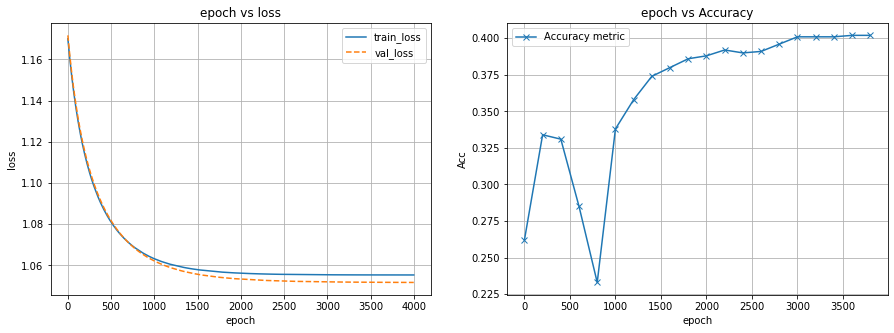

In [ ]:
fig = plt.figure(figsize=(15,5))

# Loss function Visualization
ax1 = fig.add_subplot(1, 2, 1)
ax1.plot(list_epoch, list_train_loss, label='train_loss')   # epoch별 train loss 변화 시각화
ax1.plot(list_epoch, list_val_loss, '--', label='val_loss') # epoch별 validation loss 변화 시각화
ax1.set_xlabel('epoch')
ax1.set_ylabel('loss')
ax1.grid()
ax1.legend()
ax1.set_title('epoch vs loss')

# Accuracy(Metrix) Visualization
ax2 = fig.add_subplot(1, 2, 2)
ax2.plot(list_acc_epoch, list_acc, marker='x', label='Accuracy metric') # epoch별 정확도 확인(성능 확인)
ax2.set_xlabel('epoch')
ax2.set_ylabel('Acc')
ax2.grid()
ax2.legend()
ax2.set_title('epoch vs Accuracy')

plt.show()